In [367]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [368]:
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [369]:
data_nifty_50 = pd.read_csv("nifty 50.csv", index_col='Date',
                          parse_dates=['Date'])
data_bank_nifty = pd.read_csv("NIFTY BANK.csv", 
                            index_col='Date', parse_dates=['Date'])

data_nifty_50.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [370]:
data_nifty_50.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


so we have the data sets from 2001-01-03 to 2020-05-04

# Cleaning Data

In [371]:
data_nifty_50=data_nifty_50.fillna(method="ffill")

In [372]:
data_bank_nifty=data_bank_nifty.fillna(method="ffill")

In [373]:
data_nifty_50.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Turnover     0
P/E          0
P/B          0
Div Yield    0
dtype: int64

# visualization

In [374]:
# this is the single plot

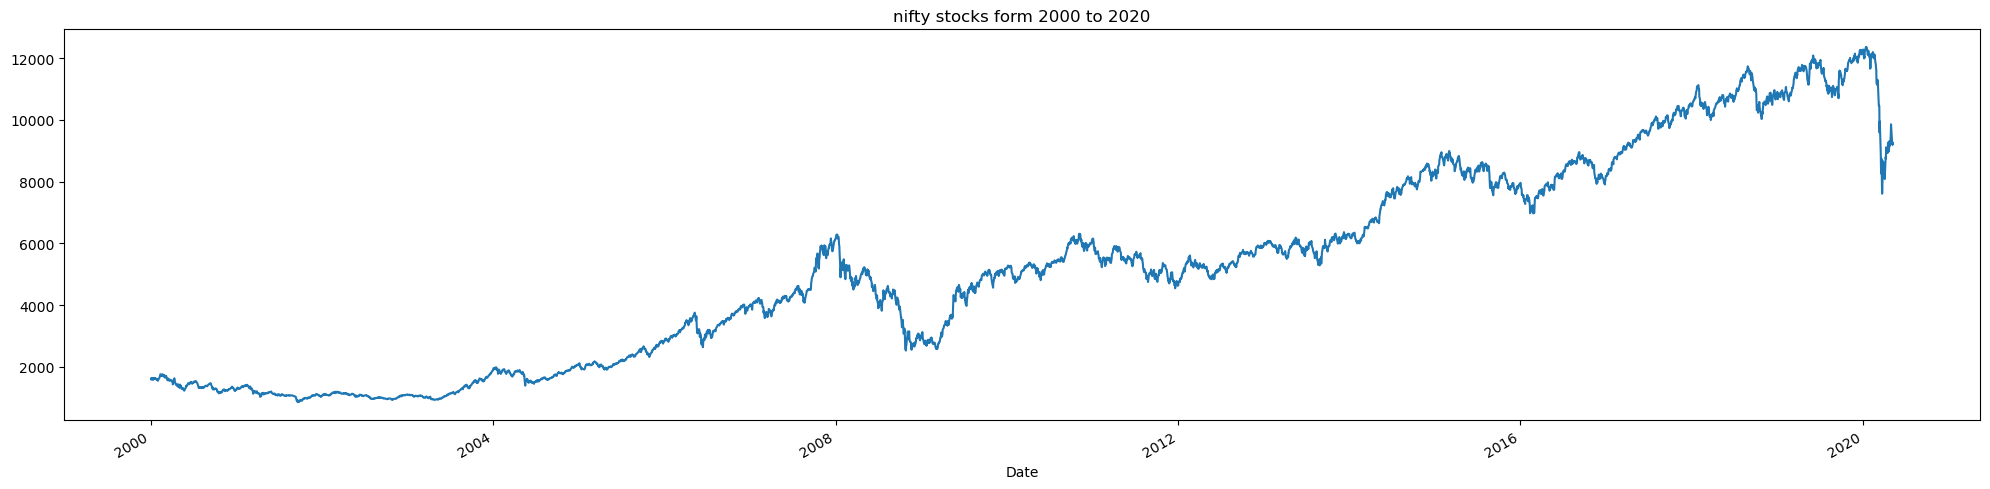

In [375]:
fig,ax=plt.subplots(figsize=[20,6])
data_nifty_50.plot(y="Close",figsize=[20,5],legend=None,ax=ax)
ax.set_title('nifty stocks form 2000 to 2020')
plt.tight_layout()

In [376]:
# lets make the function so that we donot have to write hole code when we are ploting again and again 
#simply we will call the function

In [377]:
def plot(data, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(18,6))
    ax.plot(data[start:end].index, data[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=data[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=data[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=data[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=data[attritube].idxmin() ,linewidth=2, color='y')
    
    plt.show()
    print("Max Value :  ",data[start:end].describe()[attritube]["max"])
    print("Min Value :  ",data[start:end].describe()[attritube]["min"])

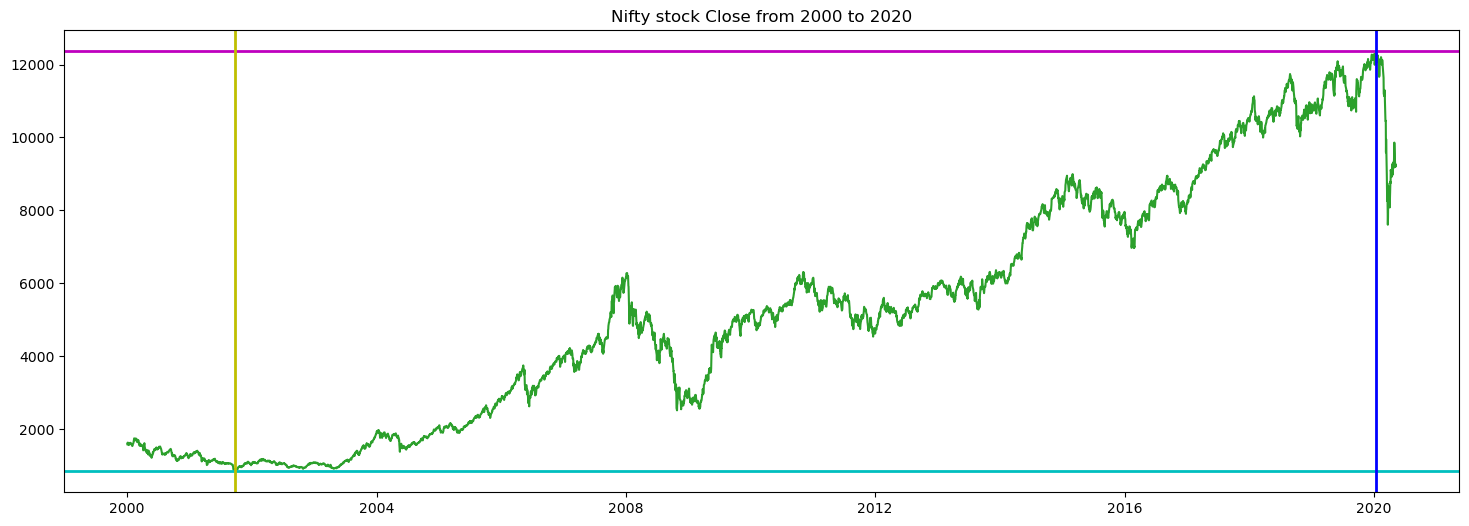

Max Value :   12362.3
Min Value :   854.2


In [378]:
plot(data_nifty_50,"Close",color='green')

here we can see the max value goes up to 12362.3 in 2020 and min value of index is 854.2 we know that why
it is minimum in 2002 there was ressession

## lets see Bank Nifty

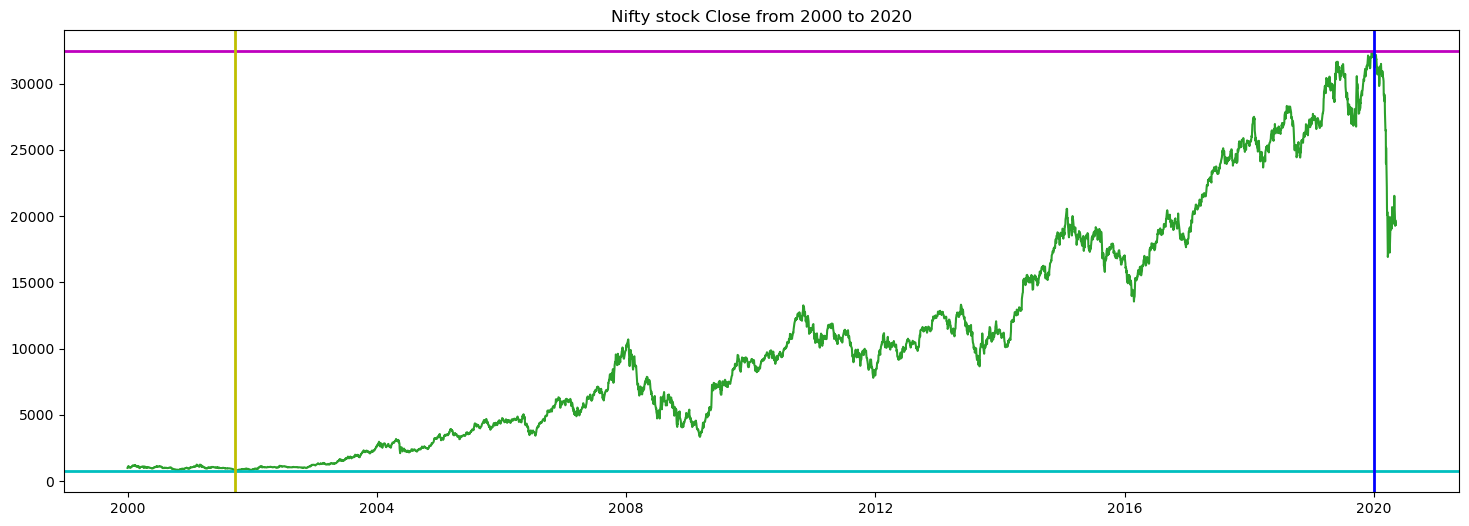

Max Value :   32443.85
Min Value :   743.7


In [379]:
plot(data_bank_nifty,"Close",color="green")

The trend is similar to nifty_50

## Comparing  nifty 50 and bank nifty

This can be done by dividing hole time series by the first element and multiplying by 100 to get the results in percantage

In [380]:
nor_data_nifty_50=data_nifty_50["Close"].div(data_nifty_50["Close"].iloc[0]).mul(100)
nor_data_bank_nifty=data_bank_nifty["Close"].div(data_bank_nifty["Close"].iloc[0]).mul(100)

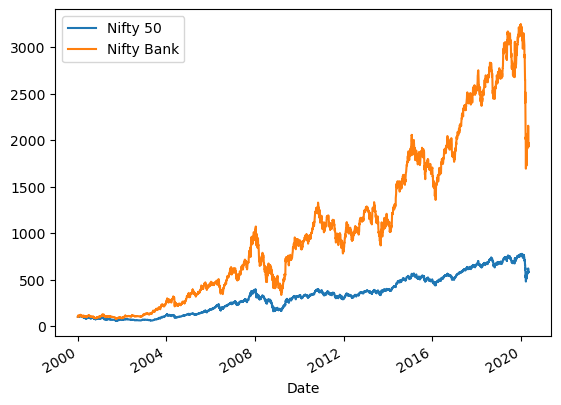

In [381]:
nor_data_nifty_50.plot()
nor_data_bank_nifty.plot()
plt.legend(['Nifty 50','Nifty Bank'])
plt.show()

# Checking for stationary 

Stationary means constant mean and variance 

Augmented Dicky-Fuller Test (ADF)

Null hypothesis - Non stationary ,
if p values comes less than 0.05 we will reject null hypothesis

In [382]:
adf_result=adfuller(data_nifty_50["Close"])
print(f" ADF Stastics:{adf_result[0]}")
print(f" P Value:{adf_result[1]}")

for key, value in adf_result[4].items():
    print("critical values:")
    print(f"{key},{value}")

 ADF Stastics:-0.7655677955763271
 P Value:0.8290276704492103
critical values:
1%,-3.4316494313795944
critical values:
5%,-2.8621142090353557
critical values:
10%,-2.5670756520148434


 Here we can see the p values is greater than 0.05 so we cannot reject null hypothesis ie there is seasonality
present in our dataset

# Method for making time series stationary
1. Differencing
2.Rolling
3.Transformation

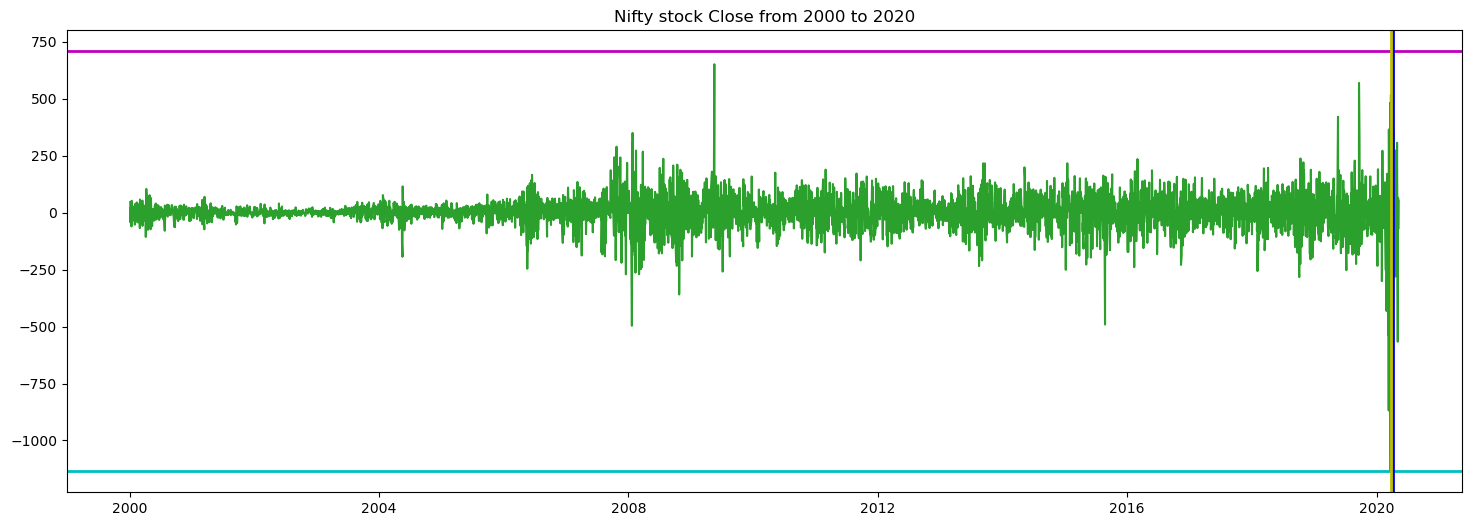

Max Value :   708.4000000000005
Min Value :   -1135.2000000000007


In [383]:
plot(data_nifty_50.diff(),"Close",color="Green")

# We can simply do it by using

In [384]:
#data_nifty_50["Close_diff"]=data_nifty_50["Close"]-data_nifty_50["Close"].shift(1)

In [385]:
#data_nifty_50["Close_diff"]=data_nifty_50["Close_diff"].dropna()

In [386]:
#plot(data_nifty_50,"Close_diff",color="Green")

# Observations
 1.Constant Variance
 2.No Trend

## Window Functionssssss

windows functions are rolling and expanding

In [387]:
partof_data=data_nifty_50["2016":"2020"]

In [388]:
rolling_data_nifty_10=partof_data.rolling(window=10).mean()
rolling_data_nifty_30=partof_data.rolling(window=30).mean()
rolling_data_nifty_100=partof_data.rolling(window=100).mean()

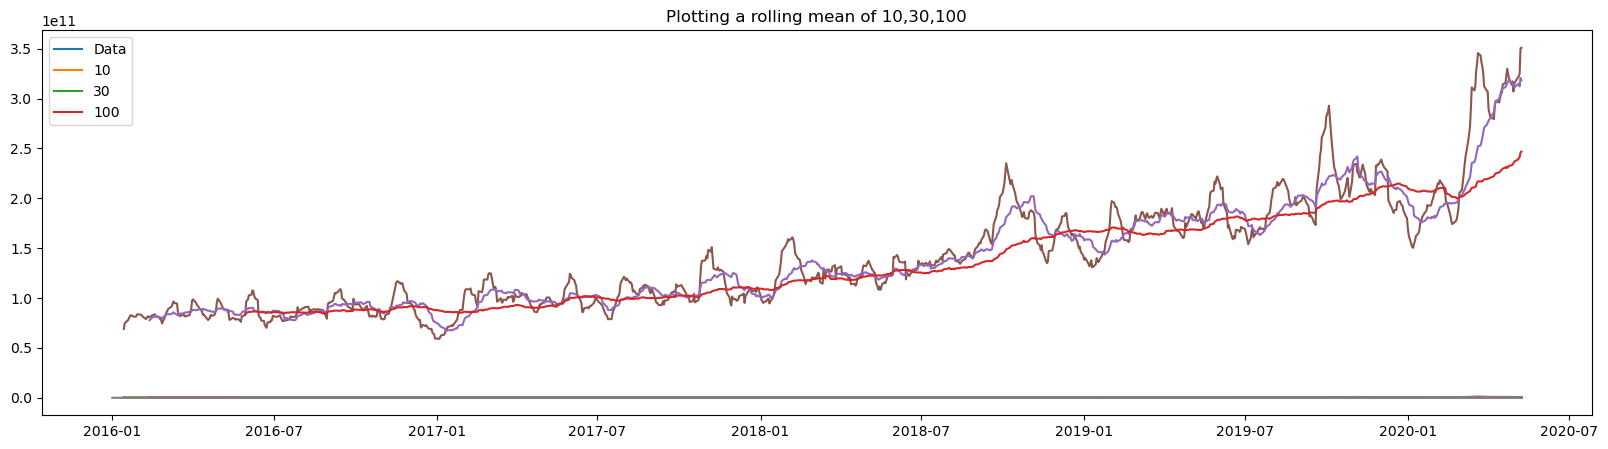

In [389]:
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(rolling_data_nifty_10.index, rolling_data_nifty_10)
ax.plot(rolling_data_nifty_30.index, rolling_data_nifty_30)
ax.plot(rolling_data_nifty_100.index, rolling_data_nifty_100)

ax.plot(partof_data.index,partof_data['Close'])
ax.set_title("Plotting a rolling mean of 10,30,100")
plt.legend(['Data','10','30','100'])
plt.show()

# Finincial chart

# 1. OHCL

In [390]:
OHLC_data = data_nifty_50['3-2018':'12-2018']

In [391]:
fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

In [392]:
fig.update_layout(title_text='Nifty 50 From March 2018 to Dec 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

In [393]:
C_data = data_nifty_50['3-2018':'12-2018']

In [394]:
fig = go.Figure(data=go.Candlestick(x=C_data.index,
                            open=C_data['Open'],
                            high=C_data['High'],
                            low=C_data['Low'],
                            close=C_data['Close']))


In [395]:
fig.update_layout(title_text='Nifty 50 From March 2018 to Dec 2018',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

## Time Series Decomposition